<a href="https://colab.research.google.com/github/keleffew/decentralized-diffusion/blob/main/Img2Img_Stable_Diffusion_on_Decentralized_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu Aug 25 07:24:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install -qq -U diffusers transformers ftfy
!pip install -qq "ipywidgets>=7,<8"

     |████████████████████████████████| 112 kB 38.5 MB/s 
     |████████████████████████████████| 4.7 MB 67.7 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 120 kB 71.7 MB/s 
     |████████████████████████████████| 6.6 MB 55.7 MB/s 
     |████████████████████████████████| 1.6 MB 28.7 MB/s 


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [ ]:
!wget https://raw.githubusercontent.com/huggingface/diffusers/4674fdf807cdefd4db1758067c0207872d805f8c/examples/inference/image_to_image.py

--2022-08-25 07:25:17--  https://raw.githubusercontent.com/huggingface/diffusers/4674fdf807cdefd4db1758067c0207872d805f8c/examples/inference/image_to_image.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6808 (6.6K) [text/plain]
Saving to: ‘image_to_image.py’

image_to_image.py   100%[===================>]   6.65K  --.-KB/s    in 0s      

2022-08-25 07:25:17 (65.9 MB/s) - ‘image_to_image.py’ saved [6808/6808]



In [ ]:
from torch import autocast
import torch
import requests
from PIL import Image
from io import BytesIO

from image_to_image import StableDiffusionImg2ImgPipeline, preprocess


In [ ]:
# load the pipeline
device = "cuda"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=True
).to(device)

Downloading:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/71.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

In [ ]:
# grab an initial image from decentralized cloud (storj dcs linkshare)
url = "https://link.storjshare.io/raw/jvg44junaslwhbekgifmzxqzvnwq/machine-learning-test%2Fryan-gosling.png"

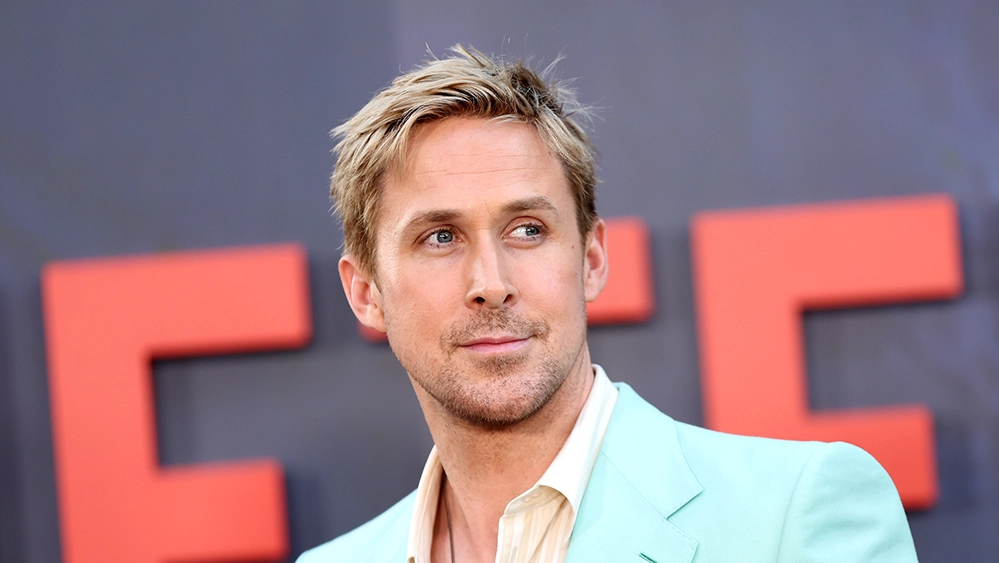

In [ ]:
response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image

In [ ]:
init_image = init_image.resize((768, 512))
init_image = preprocess(init_image)

In [ ]:
prompt = "Brittish man"

In [ ]:
with autocast("cuda"):
    images = pipe(prompt=prompt, init_image=init_image, strength=0.75, guidance_scale=7.5)["sample"]


0it [00:00, ?it/s]

In [ ]:
images[0].save("brittish-gosling.png")

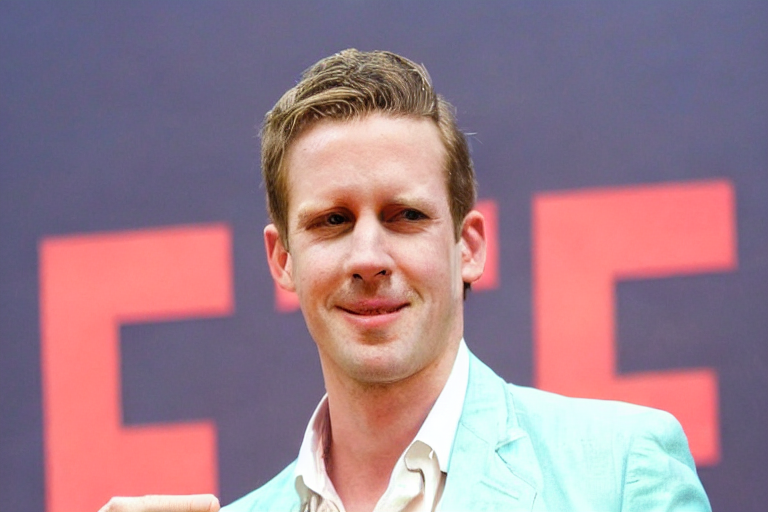

In [ ]:
images[0]

In [ ]:
#TODO Export img to decentralized cloud

# Storj Native Python Bindings
from uplink_python.uplink import Uplink

from datetime import datetime

from .errors import StorjException, BucketNotEmptyError, BucketNotFoundError
from .module_classes import ListObjectsOptions, Permission, SharePrefix
from .uplink import Uplink

if __name__ == "__main__":

# Storj configuration information
    MY_API_KEY = "1dfJdy8p9bAd3j3sAVueupZT3bsyrxM7jTXf8m6uCgkq5WBLHQS4VY5cu1c91xxrwFhLecXQUWAGt6eW8bX6NtQxg8Y8oyPRyGmdgqmcxiursd4juo8q"
    MY_SATELLITE = "12EayRS2V1kEsWESU9QMRseFhdxYxKicsiFmxrsLZHeLUtdps3S@us1.storj.io:7777"
    MY_BUCKET = "machine-learning-test"
    MY_STORJ_UPLOAD_PATH = "(optional): path / (required): filename"

# (path + filename) OR filename
    MY_ENCRYPTION_PASSPHRASE = "you'll never guess this"

# Source and destination path and file name for testing
    SRC_FULL_FILENAME = "filename with extension of source file on local system"
    DESTINATION_FULL_FILENAME = "filename with extension to save on local system"


ModuleNotFoundError: ignored